***
# <font color=navy size=9>Manipulação de Datas</font>
***

## Série de Datas
Inicialmente iremos importar a biblioteca pandas para utilizar algumas funções para **Datas**.

In [1]:
import pandas as pd

Criar uma série de datas:

In [2]:
pd.to_datetime(['01/01/2022', '01/02/2022', '01/03/2022'])

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03'], dtype='datetime64[ns]', freq=None)

Criar uma única data (Timestamp):

In [3]:
pd.to_datetime('01/01/2022')

Timestamp('2022-01-01 00:00:00')

Ajustar o formato das datas:
> Iremos mudar do padrao "dia/mês/ano" para "ano/mês/dia".

In [4]:
pd.to_datetime(['01/01/2022', '01/02/2022', '01/03/2022'],
               format = '%d/%m/%Y')

DatetimeIndex(['2022-01-01', '2022-02-01', '2022-03-01'], dtype='datetime64[ns]', freq=None)

## Outras formas de criar datas

Biblioteca Numpy

In [5]:
import numpy as np

In [6]:
pd.to_datetime(np.datetime64('2022-01-01'))

Timestamp('2022-01-01 00:00:00')

Biblioteca Datetime

In [7]:
import datetime as dt

In [8]:
pd.to_datetime(dt.datetime(2019, 1, 1))

Timestamp('2019-01-01 00:00:00')

## Operações com datas

Verificar o nome do dia:
> Utilizaremos o método "day_name()" para verificar o nome do dia.

In [9]:
dia = pd.Timestamp('2022-01-01')
dia.day_name()

'Saturday'

Realizar cálculo com datas:

In [10]:
dia1 = pd.Timestamp('2022-01-01')
dia2 = dia1 + pd.Timedelta('1 day')
dia2.day_name()

'Sunday'

Dias úteis:
> Neste exemplo iremos verificar o próximo dia útil após o dia selecionado.

In [11]:
dia = pd.Timestamp('2022-01-01')
dia_u = (dia + pd.offsets.BDay(1))
dia.day_name(), dia_u.day_name()

('Saturday', 'Monday')

## Frequências e Períodos
Criar série de datas com frequência e duração:
> Selecionei para a série iniciar em 2021, frequência diária (D) e duração de 365 dias.

In [12]:
pd.date_range('2022', freq = 'D', periods = 365)

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

Criar uma série de datas e transformar em índice:
> Neste exemplo criei uma série de datas na variável "datas" e uma série de valores aleatórios na variável "valores".

> Ao final criei um Dataframe com as duas variáveis. Utilizei a variável "datas" como índice.

In [13]:
datas = pd.date_range('2022', freq = 'D', periods = 365)
valores = np.random.normal(100, 15, 365)

df = pd.DataFrame({'Valores' : valores}, index = datas)
df

,Valores
2022-01-01,107.952285
2022-01-02,114.873229
2022-01-03,105.103778
2022-01-04,111.403313
2022-01-05,113.794539
...,...
2022-12-27,85.768373
2022-12-28,83.367800
2022-12-29,92.843182
2022-12-30,114.478332


Criar um gráfico com a Série Temporal criada:

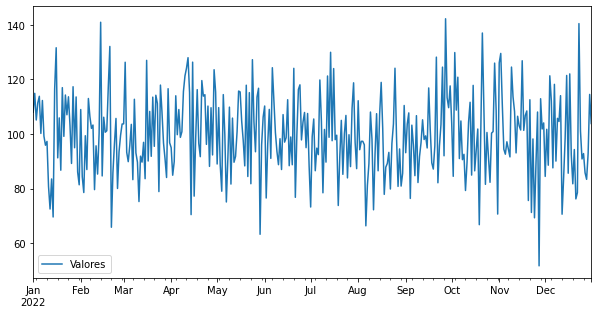

In [14]:
df.plot(figsize = (10, 5))

Gerar uma série com frequência horária:
> Selecionei para a série iniciar em 2021, frequência horária (H) e duração de 10 horas.

In [15]:
datas = pd.date_range('2022', freq = 'H', periods = 10)
datas

DatetimeIndex(['2022-01-01 00:00:00', '2022-01-01 01:00:00',
               '2022-01-01 02:00:00', '2022-01-01 03:00:00',
               '2022-01-01 04:00:00', '2022-01-01 05:00:00',
               '2022-01-01 06:00:00', '2022-01-01 07:00:00',
               '2022-01-01 08:00:00', '2022-01-01 09:00:00'],
              dtype='datetime64[ns]', freq='H')

Criar dados para montar uma Série Temporal:

In [16]:
valores = [i for i in range(0, len(datas))]
df = pd.DataFrame({'Valores' : valores}, index = datas)

Reajustar a série numa frequência de duas horas com a média dos valores:

In [17]:
df.resample('2H').mean()

,Valores
2022-01-01 00:00:00,0.5
2022-01-01 02:00:00,2.5
2022-01-01 04:00:00,4.5
2022-01-01 06:00:00,6.5
2022-01-01 08:00:00,8.5


Reajustar a série numa frequência de duas horas com a soma dos valores:

In [18]:
df.resample('2H').sum()

,Valores
2022-01-01 00:00:00,1
2022-01-01 02:00:00,5
2022-01-01 04:00:00,9
2022-01-01 06:00:00,13
2022-01-01 08:00:00,17


Reajustar a série numa frequência de meia hora com a interpolação dos valores:

In [19]:
df.resample('0.5H').interpolate()

,Valores
2022-01-01 00:00:00,0.0
2022-01-01 00:30:00,0.5
2022-01-01 01:00:00,1.0
2022-01-01 01:30:00,1.5
2022-01-01 02:00:00,2.0
2022-01-01 02:30:00,2.5
2022-01-01 03:00:00,3.0
2022-01-01 03:30:00,3.5
2022-01-01 04:00:00,4.0
2022-01-01 04:30:00,4.5


***